In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import soundfile as sf
import IPython.display as ipd

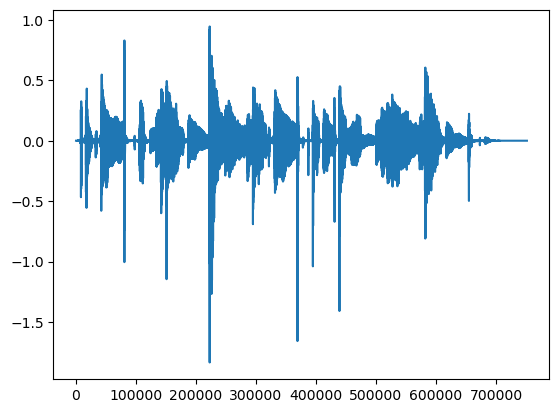

In [3]:
class WahWah(object):
    def __init__(self, fc=500, gain=1.0, q=2.0, lfo_freq=2.5, lfo_depth=100, fs=4410):
        self.fc = fc
        self.gain = gain
        self.q = q
        self.lfo_freq = lfo_freq
        self.lfo_depth = lfo_depth
        self.fs = fs

        self.z1 = 0
        self.z2 = 0
        self.lfo_phi = 0

        self.B, self.A = self.designRLPF(self.fc, self.q, self.gain, self.fs)

    def designRLPF(self, fc, q, gain, fs):
        '''
        Get the digital resonant low pass filter coefficients from 
        the analog prototype filter
        '''

        # pre warp
        fc = 2 * fs * np.tan((fc*2*np.pi)/(2*fs))

        # analog filter coefficients
        Bs = np.array([0.0, 0.0, gain])
        As = np.array([1.0/(fc*fc), 1.0/(fc*q), 1.0])

        # get digital coefficients
        Bz, Az = sig.bilinear(Bs, As, fs)
        
        return Bz, Az

    def process(self, input):
        output = np.zeros(np.size(input))
        for i in np.arange(0, np.size(input), 1):
            # TODO: implement LFO
            # update LFO phase
            self.lfo_phi = self.lfo_phi + 2*np.pi*self.lfo_freq/self.fs # THIS LINE NEEDS TO BE MODIFIED
            if self.lfo_phi > 2 * np.pi:
                self.lfo_phi -= 2 * np.pi
            # cutoff frequency offset is the scaled output of the sine of the new phase
            fc_offset = self.lfo_depth*np.sin(self.lfo_phi) # THIS LINE NEEDS TO BE MODIFIED
            
            # calcualte new filter coefficients
            self.B, self.A = self.designRLPF(self.fc+fc_offset, self.q, self.gain, self.fs)

            # get next output sample
            output[i] = self.z1 + self.B[0]*input[i]
            # update filter state
            self.z1 = self.z2 + self.B[1]*input[i] - self.A[1]*output[i]
            self.z2 = self.B[2]*input[i] - self.A[2]*output[i]
        return output

    def reset(self):
        self.z1 = 0
        self.z2 = 0


# impulse as input for making sure things run
fs = 44100
input = np.zeros(200)
input[0] = 1

# load input audio file
input, fs = sf.read(r"C:\Users\Devyani Hebbar\Downloads\MPATE2607_hw2_ipynb\MPATE2607_hw2_ipynb\gtr.wav")  


# instantiate a wahwah effect with the desired parameters
wahwah = WahWah(fc=5000, q=4, gain=2, fs=fs, lfo_freq=1.5, lfo_depth=4000)   

# process our imput audio file with the wahwah effect
output = wahwah.process(input)

plt.plot(output)

ipd.Audio(data=output, rate=fs)

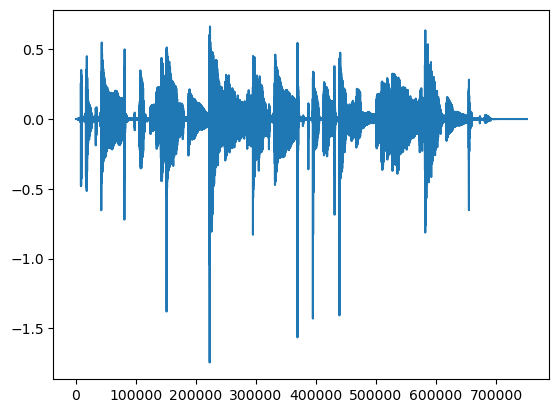

In [10]:
class WahWah(object):
    def __init__(self, fc=500, gain=1.0, q=2.0, lfo_freq=2.5, lfo_depth=100, fs=4410):
        self.fc = fc
        self.gain = gain
        self.q = q
        self.lfo_freq = lfo_freq
        self.lfo_depth = lfo_depth
        self.fs = fs

        self.z1 = 0
        self.z2 = 0
        self.lfo_phi = 0

        self.B, self.A = self.designRLPF(self.fc, self.q, self.gain, self.fs)

    def designRLPF(self, fc, q, gain, fs):
        '''
        Get the digital resonant low pass filter coefficients from 
        the analog prototype filter
        '''

        # pre warp
        fc = 2 * fs * np.tan((fc*2*np.pi)/(2*fs))

        # analog filter coefficients
        Bs = np.array([0.0, 0.0, gain])
        As = np.array([1.0/(fc*fc), 1.0/(fc*q), 1.0])

        # get digital coefficients
        Bz, Az = sig.bilinear(Bs, As, fs)
        
        return Bz, Az

    def process(self, input):
        output = np.zeros(np.size(input))
        for i in np.arange(0, np.size(input), 1):
            # TODO: implement LFO
            # update LFO phase
            self.lfo_phi = self.lfo_phi + 2*np.pi*self.lfo_freq/self.fs # THIS LINE NEEDS TO BE MODIFIED
            if self.lfo_phi > 2 * np.pi:
                self.lfo_phi -= 2 * np.pi
            # cutoff frequency offset is the scaled output of the sine of the new phase
            fc_offset = self.lfo_depth*np.sin(self.lfo_phi) # THIS LINE NEEDS TO BE MODIFIED
            
            # calcualte new filter coefficients
            self.B, self.A = self.designRLPF(self.fc+fc_offset, self.q, self.gain, self.fs)

            # get next output sample
            output[i] = self.z1 + self.B[0]*input[i]
            # update filter state
            self.z1 = self.z2 + self.B[1]*input[i] - self.A[1]*output[i]
            self.z2 = self.B[2]*input[i] - self.A[2]*output[i]
        return output

    def reset(self):
        self.z1 = 0
        self.z2 = 0


# impulse as input for making sure things run
fs = 44100
input = np.zeros(200)
input[0] = 1

# load input audio file
input, fs = sf.read(r"C:\Users\Devyani Hebbar\Downloads\MPATE2607_hw2_ipynb\MPATE2607_hw2_ipynb\gtr.wav")  


# instantiate a wahwah effect with the desired parameters
wahwah = WahWah(fc=4000, q=4, gain=2, fs=fs, lfo_freq=1.2, lfo_depth=1500)   

# process our imput audio file with the wahwah effect
output = wahwah.process(input)

plt.plot(output)

ipd.Audio(data=output, rate=fs)